# 导包、定义、读取数据

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#==============================================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，黑体的 name 为 SimHei
plt.rcParams['font.size'] = 12  # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


#==============================================
# 添加柱形图上面数字
def auto_text(rects):
    for rect in rects:
        plt.text(x=rect.get_x() + 0.1, y=rect.get_height(), s=rect.get_height(), ha='left', va='bottom')

In [3]:
# 定义数据集路径
filePath = '../data/ershoufang-utf8.csv'
# 读取数据集，设置编码为UTF-8
data = pd.read_csv(filePath, encoding='UTF-8')
# print(data)

In [4]:
# print(data)
# print(data.loc[1:5,['id','小区名称']])
# print(data.iloc[1:6,0:5])

# 对数据集进行分组，求每组的数据数量
# 求取每个区域的房源数量
# 显示求取每个区域的房源数量柱状图

In [5]:
# 对数据集进行分组，求每组的数据数量
# 求取每个区域的房源数量
area_count = data.groupby('所在区域')['id'].count()
# print(area_count)

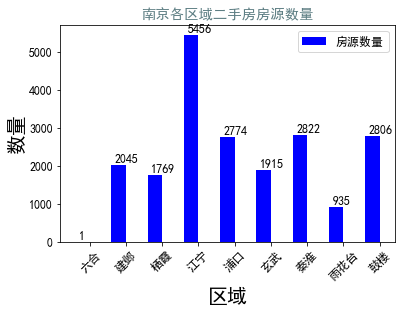

In [6]:
# 显示求取每个区域的房源数量柱状图
fig, axe = plt.subplots()

plt.title('南京各区域二手房房源数量', color='#5D7E83')

index = np.arange(len(area_count))
# 设置柱的宽度
width = 0.4

rect1 = axe.bar(index, list(area_count), width, color='b', align='center', label='房源数量')

axe.set_xticks(index + width / 2)

# 设置柱状图下标名称
axe.set_xticklabels(list(area_count.index))
#
# 设置标题
axe.legend()
axe.set_xlabel('区域', fontsize=20)
axe.set_ylabel('数量', fontsize=20)
auto_text(rect1)
# 保存图片 ==> 柱状图
plt.xticks(rotation=45)
plt.savefig('../imgs/南京各区域二手房房源数量.jpg')
plt.show()

# 南京二手房房屋朝向分布情况 TOP-10

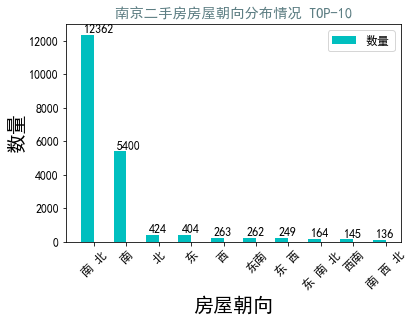

In [7]:
# 统计房屋朝向情况TOP-10，统计全部，柱形图数据过于密集，不够直观
hours_towards = data.groupby('房屋朝向')['id'].count()
# print(hours_towards.sort_values(ascending=False))
# 从高到低排序,并对取前十的数据
hours_towards_10 = hours_towards.sort_values(ascending=False).iloc[0:10]

fig, axe = plt.subplots(1)

plt.title('南京二手房房屋朝向分布情况 TOP-10', color='#5D7E83')
width = 0.4
index = np.arange(len(hours_towards_10))
rect1 = axe.bar(hours_towards_10.index, list(hours_towards_10), width, color='c', align='center', label='数量')
axe.set_xticks(index + width / 2)
axe.legend()
plt.xlabel('房屋朝向', fontsize=20)
plt.ylabel('数量', fontsize=20)
auto_text(rect1)
plt.xticks(rotation=45)
plt.savefig('../imgs/南京二手房房屋朝向分布情况前十.jpg')
plt.show()

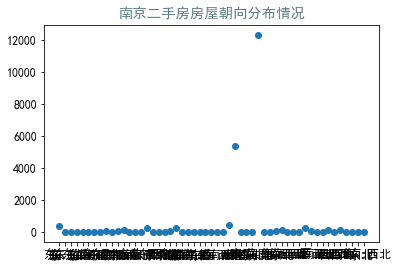

In [8]:
# 采用散点图下标过于密集，并且表现不佳
x = hours_towards.index
y = list(hours_towards)
fig, axe = plt.subplots()
axe.scatter(x, y)
plt.xticks(rotation=0)
plt.title('南京二手房房屋朝向分布情况', color='#5D7E83')
plt.savefig('../imgs/南京二手房房屋朝向分布情况.jpg')
plt.show()

# 南京二手房总价与建筑面积散点图

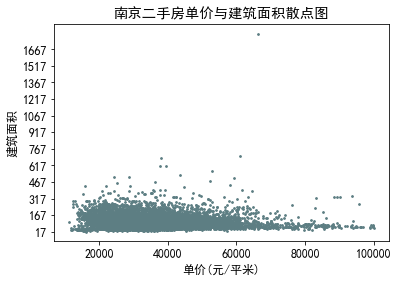

In [9]:
# 处理数据集，避免因为数据集问题导致的程序错误
d = data[data['建筑面积(㎡)'] != '暂无数据']

p1 = np.array([1, 1])

x1 = d['建筑面积(㎡)'].apply(lambda e: float(e))
y1 = d['单价(元/平米)'].apply(lambda e: int(e))

# 建筑面积最大值
max_value = max(x1)
# 建筑面积最小值
min_value = min(x1)
# 构建x轴坐标
ylist = np.arange(int(min_value) - 1, int(max_value) + 1, 150)
title = '南京二手房单价与建筑面积散点图'
fig, axe = plt.subplots()
axe.scatter(y1, x1, s=3, c='#5D7E83')
plt.yticks(ylist, rotation=0)
plt.title(title)
plt.ylabel('建筑面积')
plt.xlabel('单价(元/平米)')
plt.savefig('../imgs/' + title + '.jpg')
plt.show()

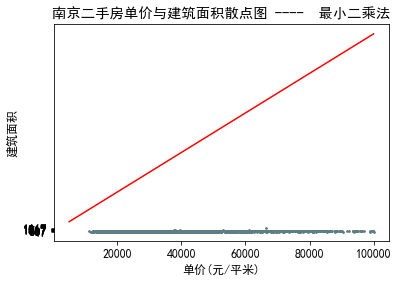

<Figure size 432x288 with 0 Axes>

In [10]:
from scipy.optimize import leastsq

# 处理数据集，避免因为数据集问题导致的程序错误
d = data[data['建筑面积(㎡)'] != '暂无数据']


# 最小二乘法实现
def func(p, x):
    k, b = p
    return k * x + b


def error(p, x, y):
    return func(p, x) - y


p1 = np.array([1, 20])
# 类型转换
x1 = d['建筑面积(㎡)'].apply(lambda e: float(e))
y1 = d['单价(元/平米)'].apply(lambda e: int(e))

para = leastsq(error, p1, args=(y1, x1))
# print(para)
k, b = para[0]
# 利用linespace函数画拟合直线，
x = np.linspace(y1.min(), y1.max())
# 构造线性函数
y = k * x + b
# 建筑面积最大值
max_value = max(x1)
# 建筑面积最小值
min_value = min(x1)
# 构建x轴坐标
ylist = np.arange(int(min_value) - 1, int(max_value) + 1, 150)
fig, axe = plt.subplots()
# 画散点图
axe.scatter(y1, x1, s=3, c='#5D7E83')
# 画拟合直线
plt.plot(x, y, color='red')
plt.yticks(ylist, rotation=0)
# 设置标题
title = '南京二手房单价与建筑面积散点图 ----  最小二乘法'
plt.title(title)
plt.xlabel('单价(元/平米)')
plt.ylabel('建筑面积')
# 保存图片
plt.savefig('../imgs/' + title + '.jpg')
plt.show()
plt.clf()

# 南京二手房建筑类型占比情况

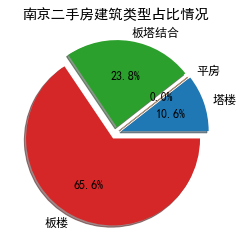

<Figure size 432x288 with 0 Axes>

In [11]:
# 去除无效数据行（无效数据行包括NAN和’暂无数据‘）
data_h_type = data['建筑类型'].dropna()
data_h_type = data_h_type[data_h_type != '暂无数据']
#使用聚合函数，对建筑类型进行计数
data_h_type = data_h_type.groupby(data['建筑类型']).count()
# 饼图
plt.pie(x=data_h_type,  # 展示的数据占比（自动计算百分比）
        autopct='%1.1f%%',  # 显示数据的百分比
        explode=((data_h_type >= 0.06) / 20 + 0.02),  # 凸显程度
        labels=data_h_type.index,  # 标签
        shadow=True)  # 显示阴影
title = '南京二手房建筑类型占比情况'
plt.title(title)
# 保存图片
plt.savefig('../imgs/' + title + '.jpg')
plt.show()
plt.clf()

# 南京二手房房屋装修占比情况

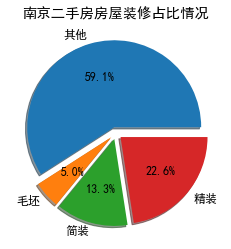

<Figure size 432x288 with 0 Axes>

In [12]:
# 去除无效数据行（无效数据行包括NAN和’暂无数据‘）
data_furnish_happening = data['装修情况'].dropna()
#使用聚合函数，对建筑类型进行计数
data_furnish_happening = data_furnish_happening.groupby(data['装修情况']).count()
# 饼图
plt.pie(x=data_furnish_happening,  # 展示的数据占比（自动计算百分比）
        autopct='%1.1f%%',  # 显示数据的百分比
        explode=((data_furnish_happening >= 0.06) / 20 + 0.02),  # 凸显程度
        labels=data_furnish_happening.index,  # 标签
        shadow=True)  # 显示阴影
title = '南京二手房房屋装修占比情况'
plt.title(title)
# 保存图片
plt.savefig('../imgs/' + title + '.jpg')
plt.show()
plt.clf()

# 南京二手房房屋户型占比情况

房屋户型
2室1厅1厨1卫    4915
2室2厅1厨1卫    3087
3室2厅1厨2卫    2888
3室2厅1厨1卫    2761
3室1厅1厨1卫    1975
1室1厅1厨1卫    1359
4室2厅1厨2卫    1218
Name: 房屋户型, dtype: int64
2300


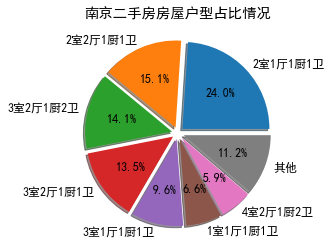

<Figure size 432x288 with 0 Axes>

In [13]:
# 房屋户型
# 去除无效数据行
TOP_N = 7
data_house_type = data['房屋户型'].dropna()
#使用聚合函数，对建筑类型进行计数
data_house_type = data_house_type.groupby(data['房屋户型']).count()
data_house_type1 = data_house_type.sort_values(ascending=False).iloc[0:TOP_N]
print(data_house_type1)
# 统计其他类型房屋户型类型数量
others_count = 0
for i in data_house_type.sort_values(ascending=False).iloc[TOP_N:]:
    others_count += i
print(others_count)
data_house_type1['其他'] = others_count

# 饼图
plt.pie(x=data_house_type1,  # 展示的数据占比（自动计算百分比）
        autopct='%1.1f%%',  # 显示数据的百分比
        explode=((data_house_type1 >= 0.06) / 20 + 0.02),  # 凸显程度
        labels=data_house_type1.index,  # 标签
        shadow=True)  # 显示阴影
title = '南京二手房房屋户型占比情况'
plt.title(title)
# 保存图片
plt.savefig('../imgs/' + title + '.jpg')
plt.show()
plt.clf()